# Plotting Lossy Compression vs Original Data

This notebook reads in some surface temperature (`TS`) and precipitation (`PRECT`) data from the atmosphere.
The data comes from a CESM large ensemble run.

In [43]:
# Add ldcpy root to system path
import sys
sys.path.append('../../..')

# Import ldcpy package
import ldcpy
import ldcpy.plot as lp
%matplotlib inline

## Open datasets for reading

`open_datasets()` is a wrapper to `xr.open_dataset()` and `xr.concat()` that probably mimics behavior from `xr.open_mfdataset()`. It adds an `ensemble` coordinate to help users track which slice comes from which file.

For this notebook, we will read in original data as well as two levels of compression from `TS` and `PRECT` data. The way the `data/` is organized, this means reading 6 separate files.

In [44]:
ds = ldcpy.open_datasets(['../../../data/cam-fv/orig.TS.100days.nc', '../../../data/cam-fv/zfp1.0.TS.100days.nc', '../../../data/cam-fv/zfp1e-1.TS.100days.nc'],
                         ['orig', 'zfpA1.0', 'zfpA1e-1'])

ds

<xarray.Dataset>
Dimensions:    (ensemble: 3, ilev: 31, lat: 192, lev: 30, lon: 288, nbnd: 2, time: 100)
Coordinates:
  * time       (time) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ensemble   (ensemble) <U8 'orig' 'zfpA1.0' 'zfpA1e-1'
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    gw         (lat) float64 3.382e-05 0.0002705 ... 0.0002705 3.382e-05
    time_bnds  (time, nbnd) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
    P0         float64 1e+05
    hybi       (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    hyai       (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    TS         (ensemble, time, lat, lon) float32 242.21022 ... 246.75244
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B20TRC5CNBDRD.f09_g16.030
    title:            UNSET
    logname:          mai
    host:             ys0110
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Wed Oct 16 12:10:39 2019: ncks -d time,0,99,1 -v TS,gw,...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

In [45]:
# ds2 contains PRECT data
ds2 = ldcpy.open_datasets(['../../../data/orig.PRECT.100days.nc', '../../../data/zfp1e-7.PRECT.100days.nc', '../../../data/zfp1e-11.PRECT.100days.nc'],
                         ['orig', 'zfpA1e-7', 'zfpA1e-11'])
ds2

<xarray.Dataset>
Dimensions:    (ensemble: 3, ilev: 31, lat: 192, lev: 30, lon: 288, nbnd: 2, time: 100)
Coordinates:
  * time       (time) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ensemble   (ensemble) <U9 'orig' 'zfpA1e-7' 'zfpA1e-11'
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    gw         (lat) float64 3.382e-05 0.0002705 ... 0.0002705 3.382e-05
    time_bnds  (time, nbnd) object 1920-01-01 00:00:00 ... 1920-04-10 00:00:00
    P0         float64 1e+05
    hybi       (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    hyai       (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    PRECT      (ensemble, time, lat, lon) float32 2.2210726e-13 ... 8.630147e-08
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B20TRC5CNBDRD.f09_g16.030
    title:            UNSET
    logname:          mai
    host:             ys0110
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/USGS-gtop...
    history:          Fri Oct 18 11:23:55 2019: ncks -d time,0,99,1 -v PRECT,...
    NCO:              netCDF Operators version 4.7.9 (Homepage = http://nco.s...

#### Revisiting Mo's error metric class

The `ldcpy` library includes a wrapper to the `ErrorMetric` class to make it easy to print stats from comparing a compressed file to the original dataset. Below we compare both levels of compression in TS to the original

In [46]:
ldcpy.print_stats(ds, 'TS', 'orig', 'zfpA1.0')
print('----')
ldcpy.print_stats(ds, 'TS', 'orig', 'zfpA1e-1')

Comparing orig data to zfpA1.0 data
{
    "root_mean_squared_error": 0.07527297655350516,
    "ks_p_value": [
        0.9999947706571545,
        0.0
    ],
    "max_error": 0.4058837890625,
    "min_error": -0.361724853515625,
    "standard_deviation_observed": 23.10856581306422,
    "standard_deviation_modelled": 23.10856581306422,
    "covariance": 533.8405046664303,
    "mean_observed": 274.7137027669836,
    "mean_error": 0.00576729244656033,
    "variance_observed": 533.680828155477,
    "variance_modelled": 533.680828155477,
    "mean_absolute_error": 0.05852021166571864,
    "mean_squared_error": 0.005666020999224538,
    "pearson_correlation_coefficient": 0.9999947706571547,
    "mean_modelled": 274.707935474537
}
----
Comparing orig data to zfpA1e-1 data
{
    "root_mean_squared_error": 0.0053357368968684074,
    "ks_p_value": [
        0.9999999736752676,
        0.0
    ],
    "max_error": 0.022918701171875,
    "min_error": -0.021514892578125,
    "standard_deviation_obser

## Plots!

There are a few different plots available.

#### Comparing the mean of two fields

On the left is the original `TS` dataset, on the right is one of the compressed datasets

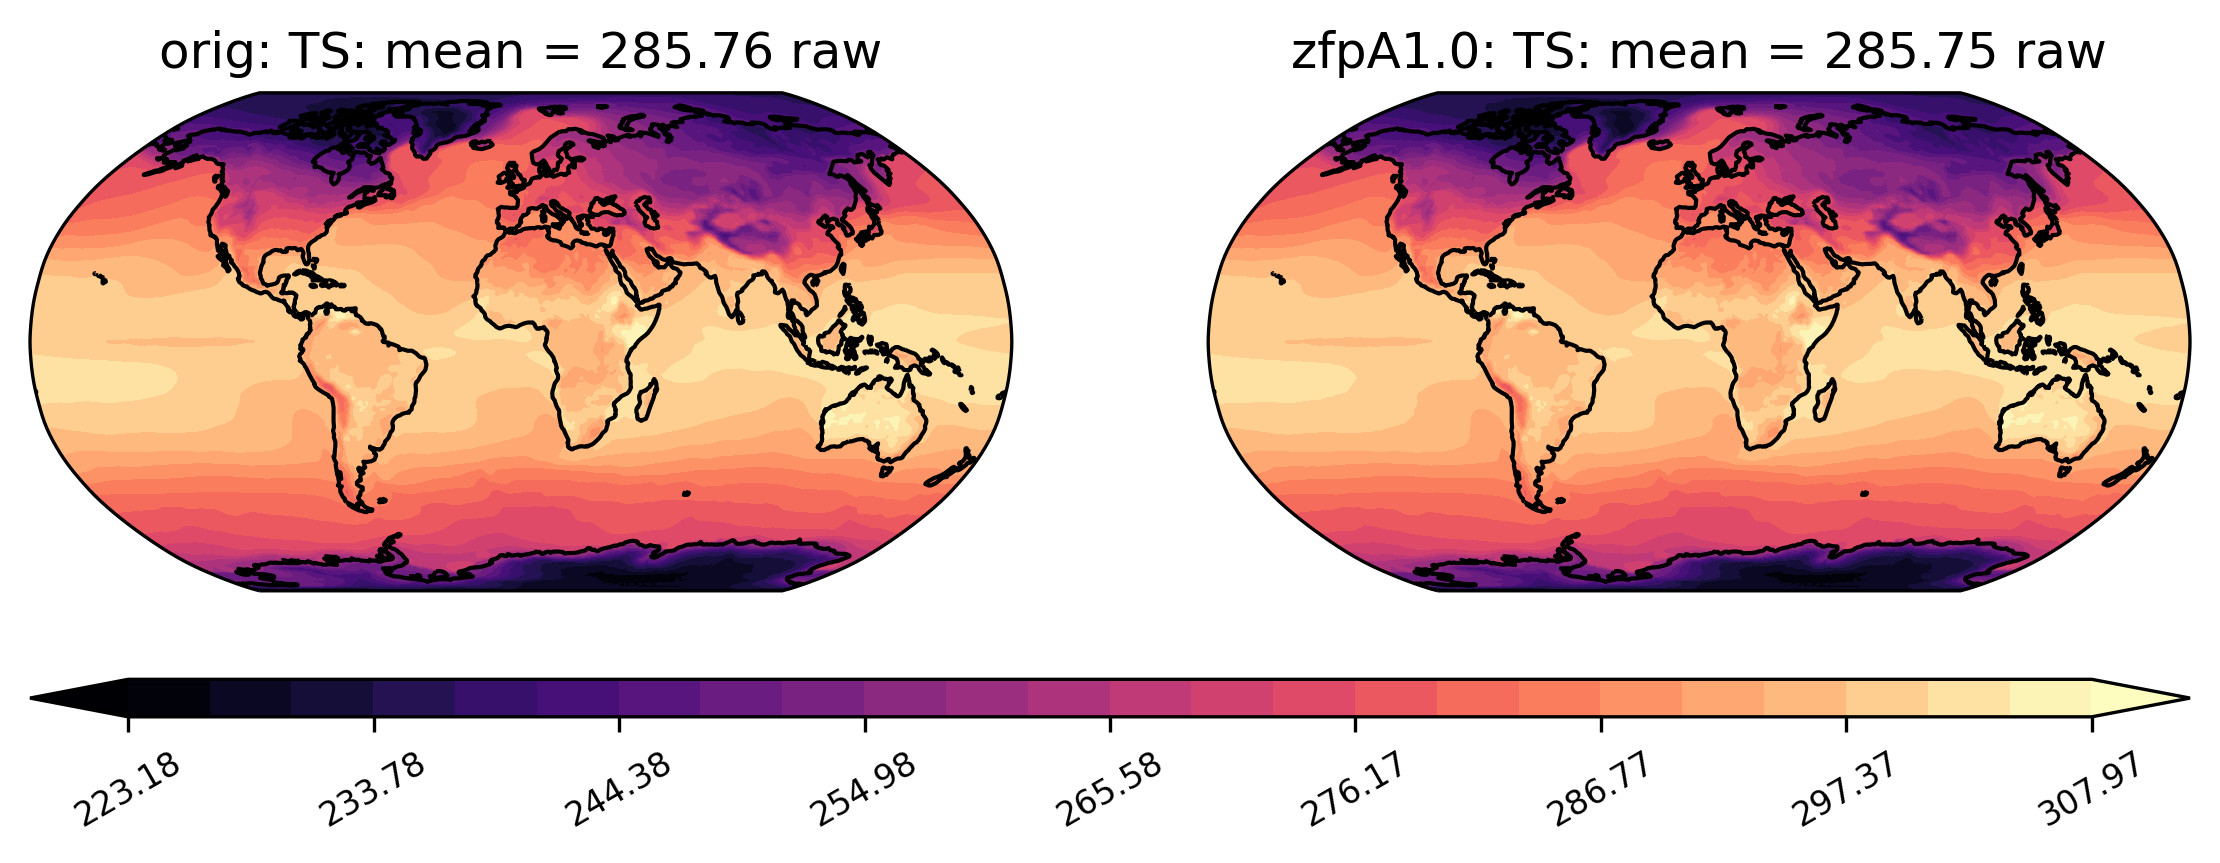

In [47]:
lp.plot(ds, 'TS', 'orig', ens_r='zfpA1.0', metric="mean", plot_type="spatial_comparison", color="magma")

#### Comparing standard deviation

We should check to see if the temporal variability changes under compression.
In these plots we're looking at 100 days (of `TS`) rather than the full 160 years of data that's available,
so the difference in standard deviation isn't very large.

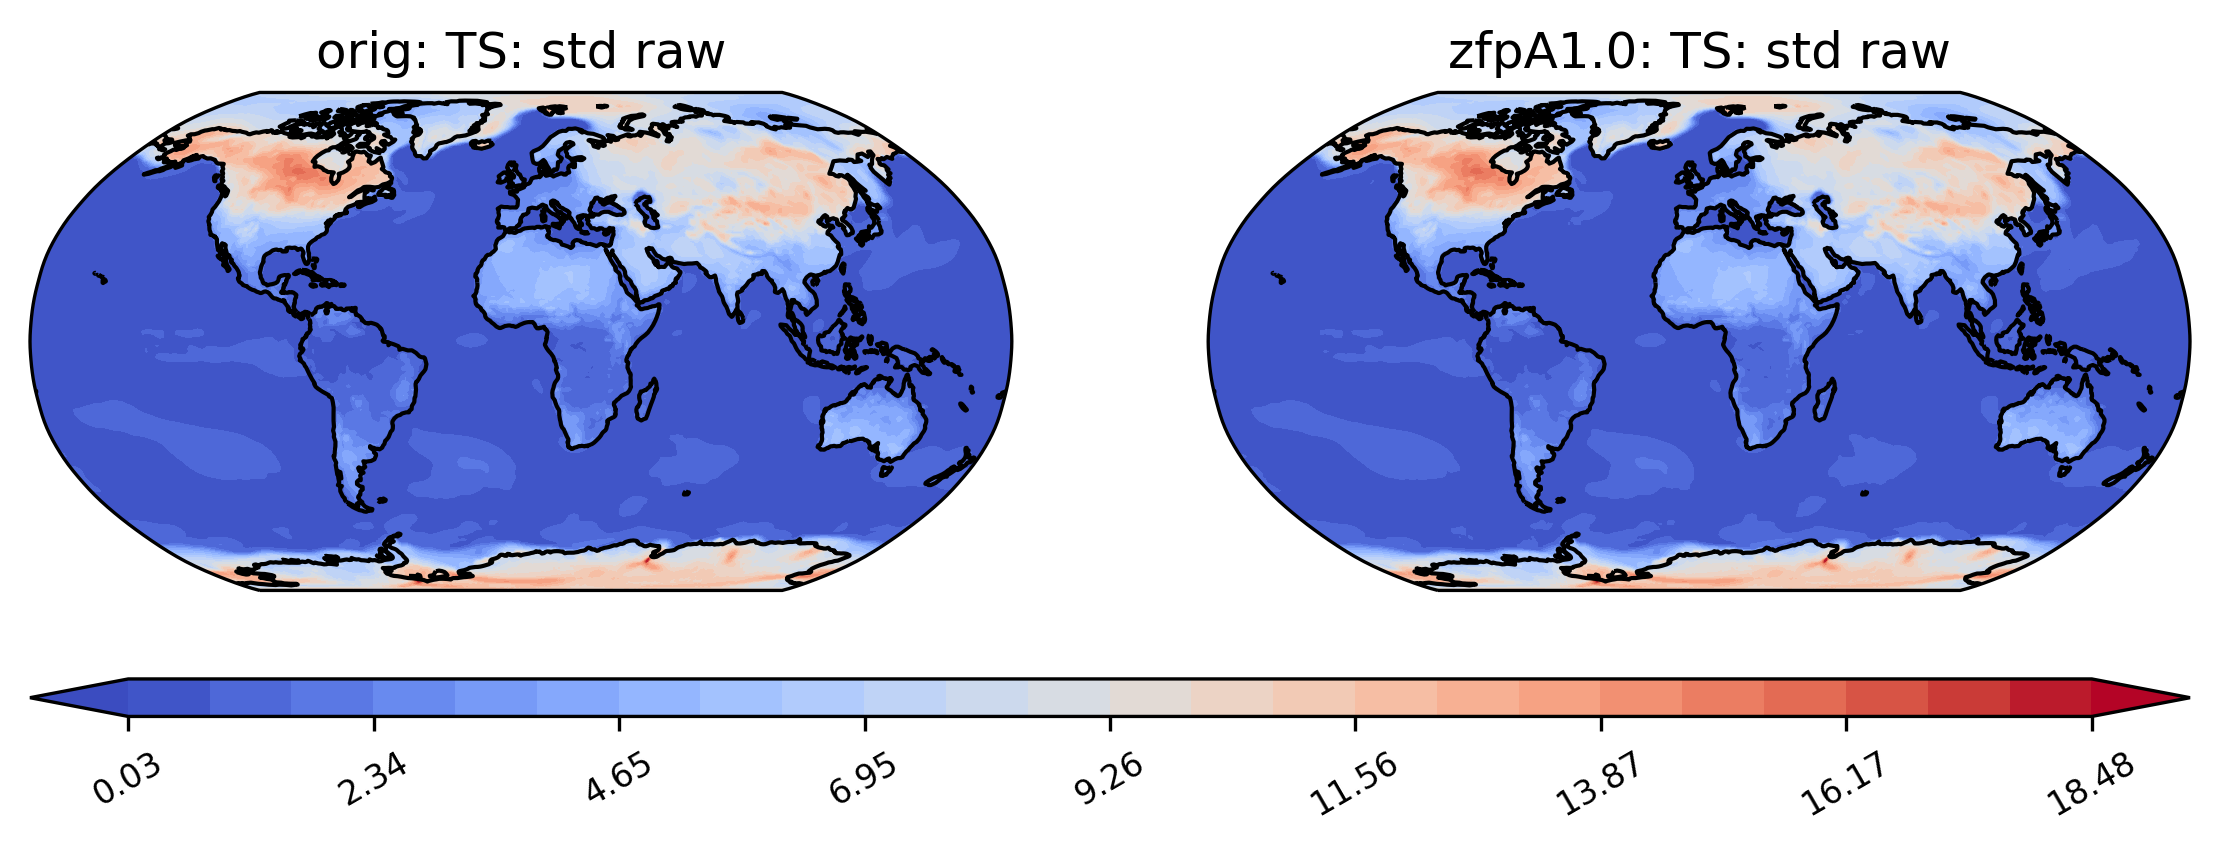

In [48]:
lp.plot(ds, 'TS', 'orig', ens_r='zfpA1.0', metric="std", plot_type="spatial_comparison", color="coolwarm")

#### Comparing standard deviation

On the left is North-South contrast variance for the original `TS` dataset, on the right is the North-South contrast variance for one of the compressed datasets

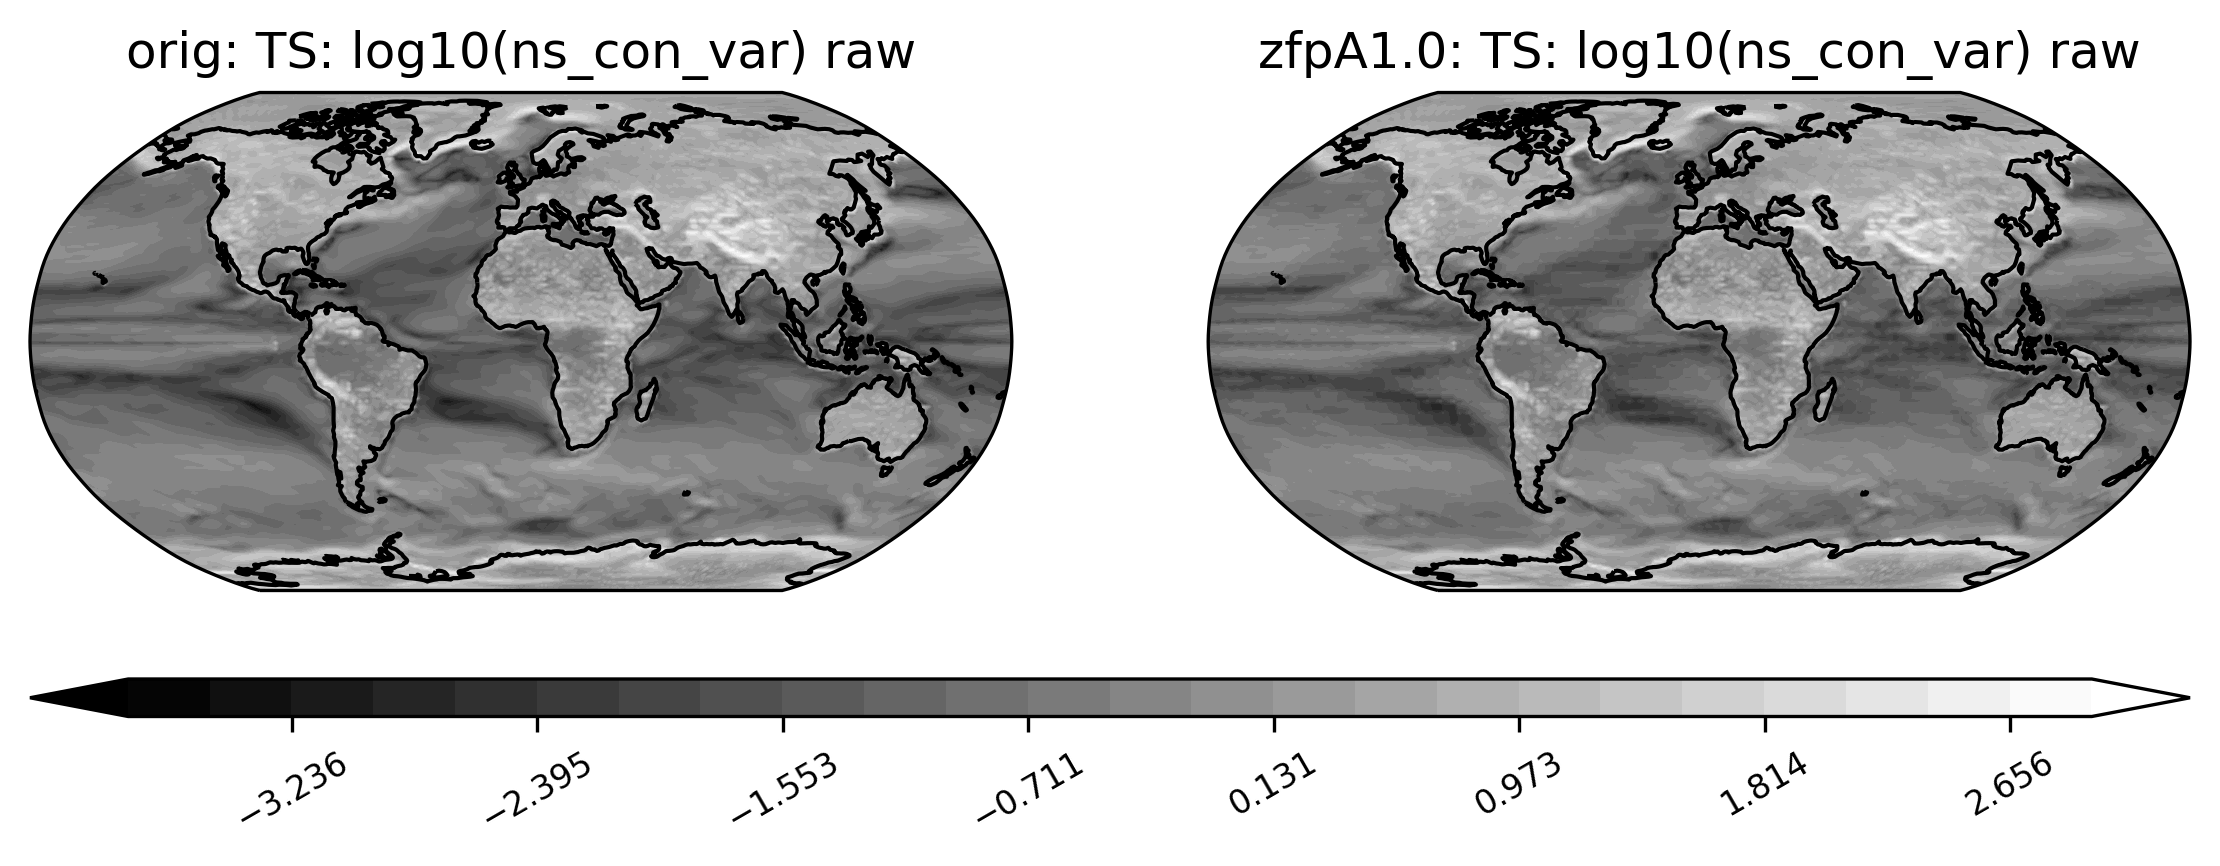

In [49]:
lp.plot(ds, 'TS', 'orig', ens_r='zfpA1.0', metric="ns_con_var", plot_type="spatial_comparison", color="binary_r", transform="log")

#### Plotting the error (compressed - original)

We can also take the time mean of the error between compressed and uncompressed data.
Below are the mean errors from the two levels of compression for `TS`.

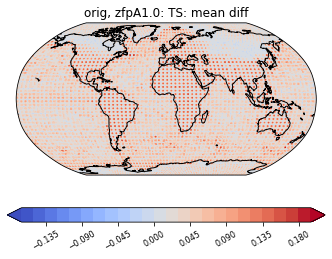

In [50]:
lp.plot(ds, 'TS', 'orig', ens_r='zfpA1.0', metric="mean", metric_type="diff", plot_type="spatial")

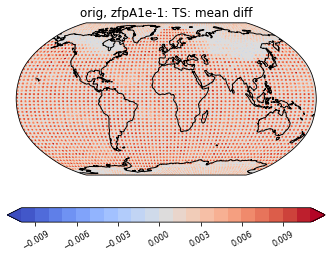

In [51]:
lp.plot(ds, 'TS', 'orig', ens_r='zfpA1e-1', metric="mean", metric_type="diff", plot_type="spatial")

#### Time series plots

Coming soon?
(We were hoping this function would be ready, it would be the time series of the error at a specified point.)

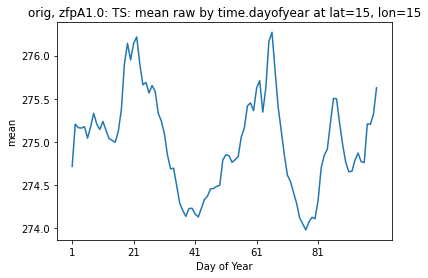

In [52]:
lp.plot(ds, 'TS', 'orig', ens_r="zfpA1.0", metric="mean", plot_type="time_series", group_by="time.dayofyear", lat=15, lon=15)

## PRECT and "bad" compression

For `PRECT` we tried to show what happens when you compress too much.

#### Plots

The first plot shows this "bad" compression, though it looks okay in the eyeball norm.
(The second plot shows the same comparison with better compression).

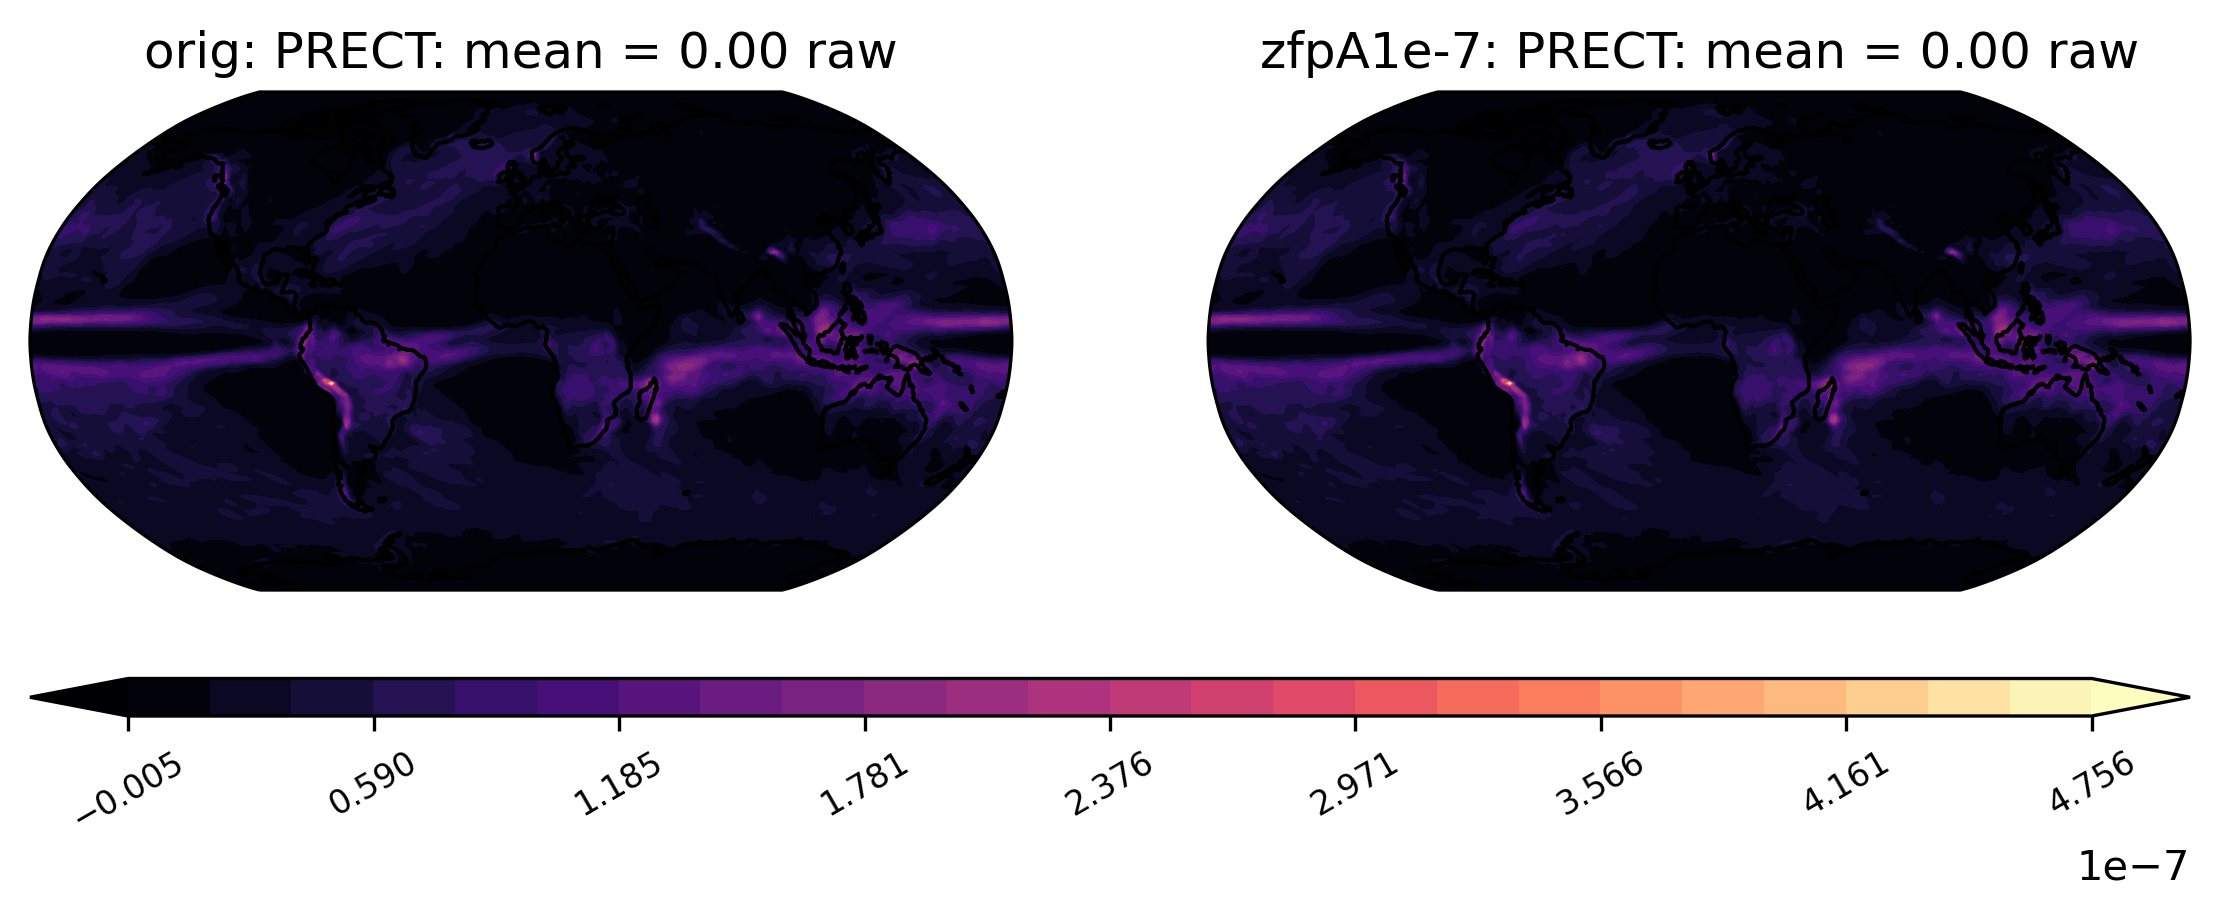

In [53]:
lp.plot(ds2, 'PRECT', 'orig', ens_r='zfpA1e-7', metric="mean", plot_type="spatial_comparison", color="magma")

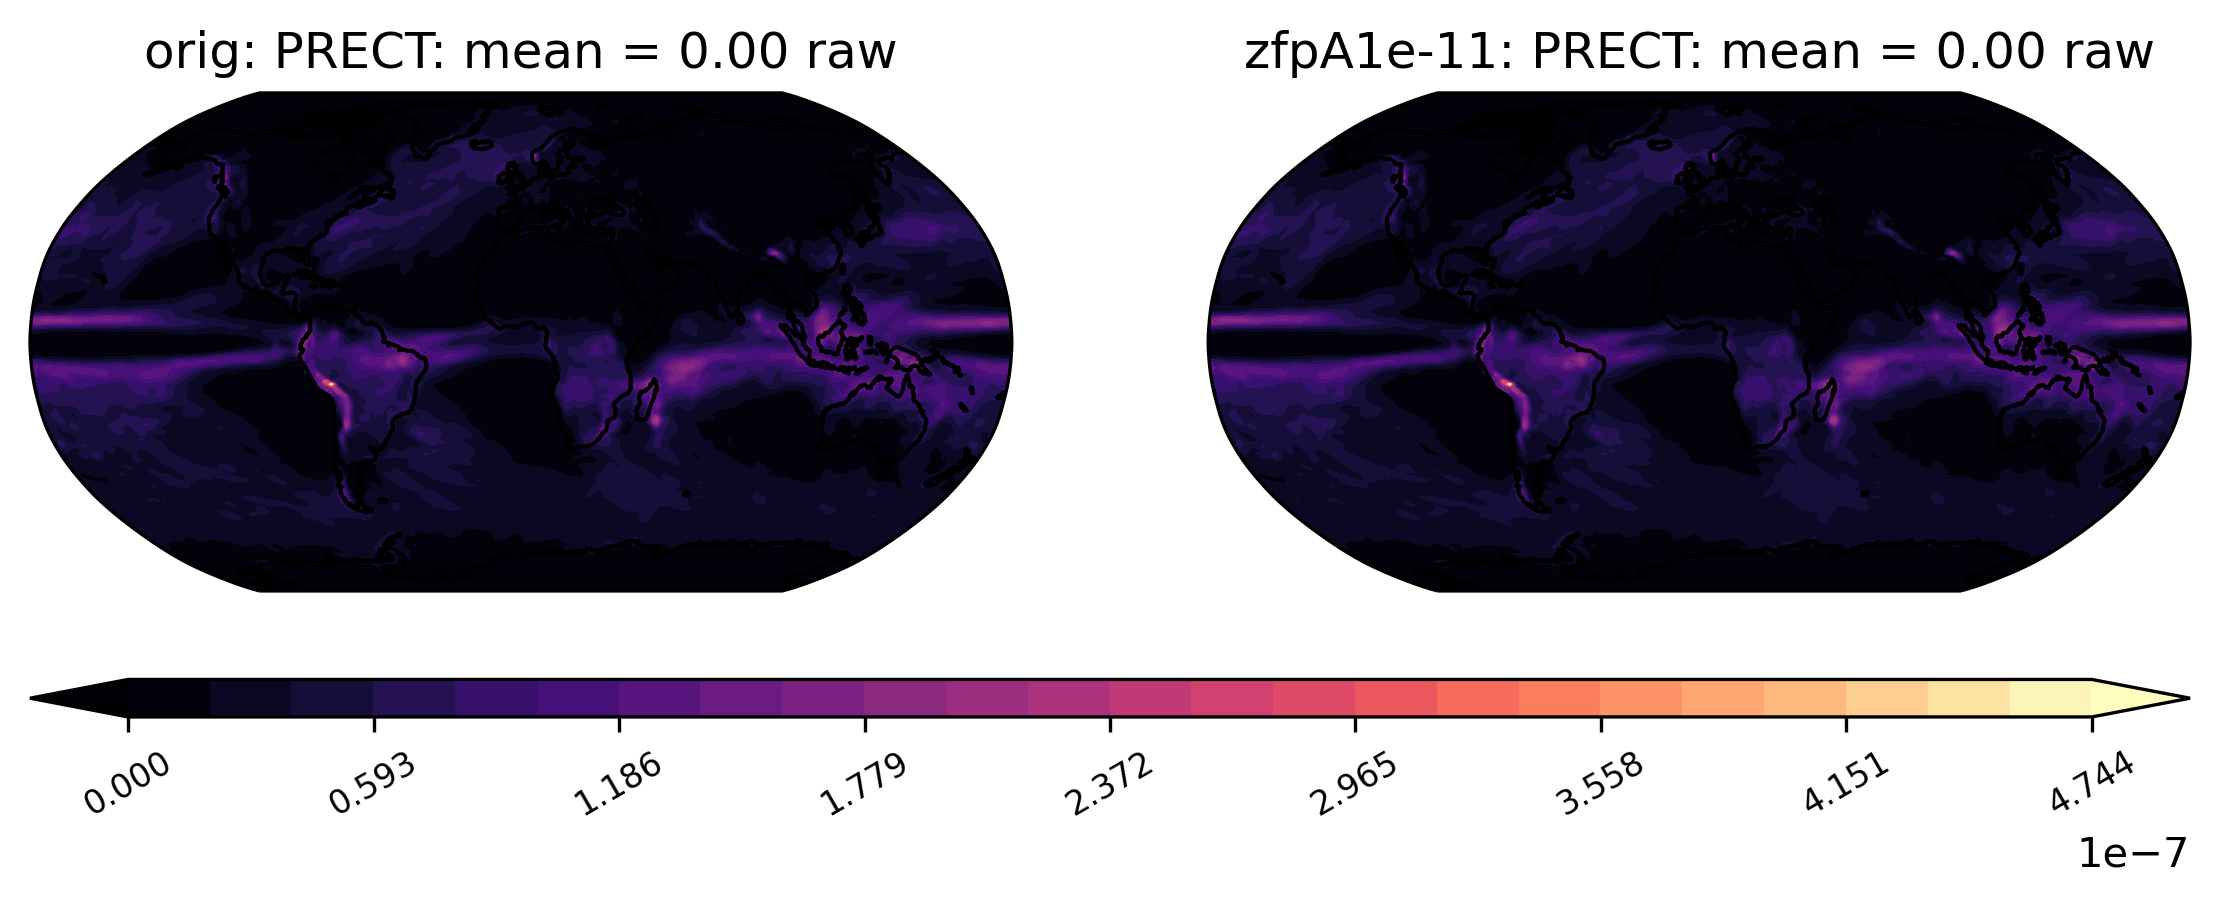

In [54]:
lp.plot(ds2, 'PRECT', 'orig', ens_r='zfpA1e-11', metric="mean", plot_type="spatial_comparison", color="magma")

#### Statistical Comparison

Note that the RMSE is much larger for the bad compression than the good compression.
The number reported is absolute RMSE, but it's large relative to the `O(1e-7)` data.

In [55]:
ldcpy.print_stats(ds2, 'PRECT', 'orig', 'zfpA1e-7')
print('----')
ldcpy.print_stats(ds2, 'PRECT', 'orig', 'zfpA1e-11')

Comparing orig data to zfpA1e-7 data
{
    "root_mean_squared_error": 3.668229093860421e-09,
    "ks_p_value": [
        0.9985481786382903,
        0.0
    ],
    "max_error": 1.9644747162317344e-08,
    "min_error": -2.1862296029073747e-08,
    "standard_deviation_observed": 6.795656508229702e-08,
    "standard_deviation_modelled": 6.795656508229702e-08,
    "covariance": 4.620296149568025e-15,
    "mean_observed": 2.3052133169208565e-08,
    "mean_error": 5.902918874239642e-11,
    "variance_observed": 4.635949981591499e-15,
    "variance_modelled": 4.635949981591499e-15,
    "mean_absolute_error": 2.2880570175236454e-09,
    "mean_squared_error": 1.3455904685044047e-17,
    "pearson_correlation_coefficient": 0.99854817863829,
    "mean_modelled": 2.2993103980466172e-08
}
----
Comparing orig data to zfpA1e-11 data
{
    "root_mean_squared_error": 6.00706499266197e-13,
    "ks_p_value": [
        0.9999999999609323,
        0.0
    ],
    "max_error": 2.8243934968585904e-12,
    "min

#### One more set of plots

Also, we can look at plots of the error.

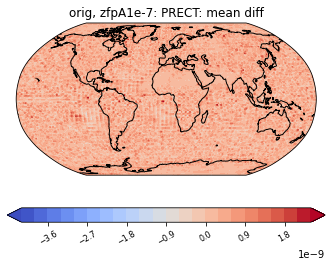

In [56]:
lp.plot(ds2, 'PRECT', 'orig', ens_r='zfpA1e-7', metric="mean", metric_type="diff", plot_type="spatial")

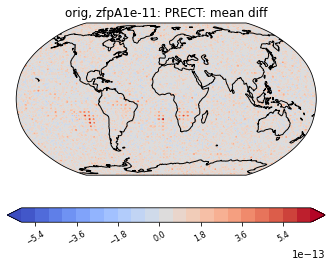

In [57]:
lp.plot(ds2, 'PRECT', 'orig', ens_r='zfpA1e-11', metric="mean", metric_type="diff", plot_type="spatial")